In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
# data from https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

confirmed = pd.read_csv('..\\data\\raw\\humdata\\time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('..\\data\\raw\\humdata\\time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('..\\data\\raw\\humdata\\time_series_covid19_recovered_global.csv')

In [49]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [43]:
def get_beta_and_gamma(time_series):
    """
    
    """
    def gamma_t(current_t, next_t): 
        return (next_t['recovered'] - current_t['recovered'])/current_t['infected']
    
    def beta_t(current_t, next_t):
        return (next_t['infected']-current_t['infected']+next_t['recovered']-current_t['recovered'])/current_t['infected']
    
    tmp = pd.concat([time_series, time_series.shift(-1)], axis=1)
    
    time_series['gamma'] = tmp.apply(lambda x: gamma_t(x[:int(len(x)/2)], x[int(len(x)/2):]), axis=1)
    time_series['beta'] = tmp.apply(lambda x: beta_t(x[:int(len(x)/2)], x[int(len(x)/2):]), axis=1)
    
    return time_series

In [82]:
def make_dataframe(country):

    df = confirmed[confirmed['Country/Region'] == country]
    df = df.drop(columns = ['Province/State', 'Country/Region', 'Lat', 'Long']).T
    df.columns = ['confirmed']

    tmp = deaths[deaths['Country/Region'] == country]
    tmp = tmp.drop(columns = ['Province/State', 'Country/Region', 'Lat', 'Long']).T
    tmp.columns = ['dead']

    df['dead'] = tmp['dead']

    tmp = recovered[recovered['Country/Region'] == country]
    tmp = tmp.drop(columns = ['Province/State', 'Country/Region', 'Lat', 'Long']).T
    tmp.columns = ['recovered']

    df['recovered'] = tmp['recovered']


    df = df[df['confirmed'] >= 100]
    
    df.index = pd.to_datetime(df.index.to_series()).values
    df = df.reset_index().rename(columns={'index':'date', 'confirmed':'infected'})
    
    df = df[df.date >= datetime(2020, 4,1)]
    df['recovered'] = df['recovered'] + df['dead']
    
    df = get_beta_and_gamma(df)
    
    df['R0_t'] = df['beta'] / df['gamma']
    
    return  df.drop(columns=['dead'])

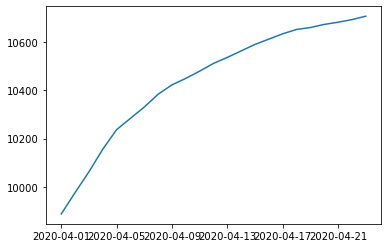

In [83]:
df = make_dataframe('Korea, South')
plt.plot(df['date'], df['infected'])

In [84]:
df.describe()

,infected,recovered,gamma,beta,R0_t
count,23.00000,23.000000,22.000000,22.000000,22.000000
mean,10443.26087,7437.521739,0.013210,0.016846,1.272387
std,242.33996,853.704541,0.006557,0.008716,0.144680
min,9887.00000,5732.000000,0.006084,0.007114,1.061947
25%,10307.50000,6835.000000,0.008717,0.010650,1.170842
50%,10512.00000,7582.000000,0.011278,0.014852,1.271739
75%,10644.00000,8114.000000,0.014194,0.021134,1.331299
max,10708.00000,8741.000000,0.030511,0.039853,1.588889


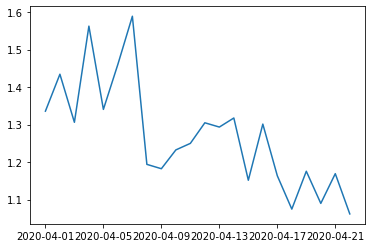

In [85]:
plt.plot(df['date'], df['R0_t'])

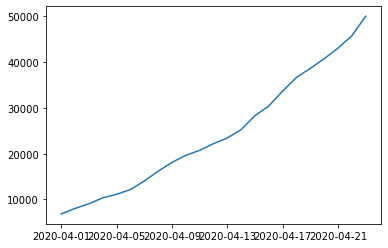

In [86]:
df = make_dataframe('Brazil')
plt.plot(df['date'], df['infected'])

In [87]:
df.describe()

,infected,recovered,gamma,beta,R0_t
count,23.000000,23.000000,22.000000,22.000000,22.000000
mean,24542.869565,9282.260870,0.046694,0.141985,12.542886
std,13163.786559,10980.216732,0.102737,0.108908,7.400109
min,6836.000000,367.000000,0.003234,0.057277,1.243059
25%,13097.500000,752.000000,0.005061,0.081287,5.624957
50%,22192.000000,1396.000000,0.008305,0.117097,15.176392
75%,35170.000000,16273.500000,0.021756,0.159631,16.305042
max,50036.000000,29904.000000,0.442720,0.563772,29.914286


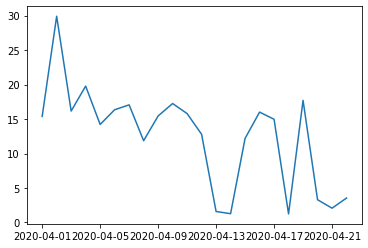

In [88]:
plt.plot(df['date'], df['R0_t'])

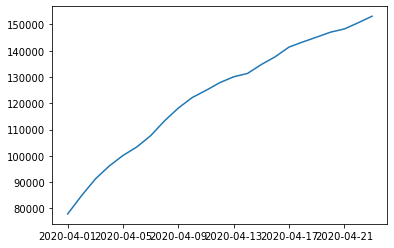

In [89]:
df = make_dataframe('Germany')
plt.plot(df['date'], df['infected'])

In [90]:
df.describe()

,infected,recovered,gamma,beta,R0_t
count,23.000000,23.000000,22.000000,22.000000,22.000000
mean,123061.956522,63306.826087,0.034115,0.065535,2.599776
std,22494.878616,28802.240869,0.020773,0.034694,2.946535
min,77872.000000,19620.000000,0.002257,0.030680,1.316714
25%,105518.500000,34303.500000,0.025421,0.041566,1.541702
50%,127854.000000,63322.000000,0.028071,0.050335,1.683355
75%,142369.500000,88662.500000,0.036657,0.075352,2.470204
max,153129.000000,108875.000000,0.098010,0.150330,15.384956


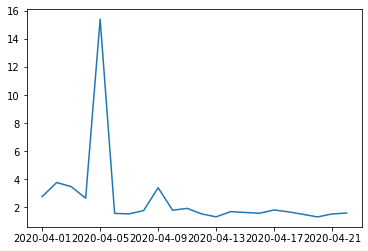

In [91]:
plt.plot(df['date'], df['R0_t'])

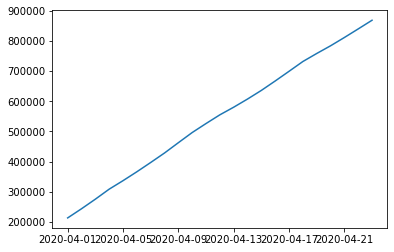

In [96]:
df = make_dataframe('US')
plt.plot(df['date'], df['infected'])

In [97]:
df.describe()

,infected,recovered,gamma,beta,R0_t
count,23.000000,23.000000,22.000000,22.000000,22.000000
mean,547802.347826,65265.739130,0.010458,0.076870,7.982552
std,202662.714304,38826.966339,0.004444,0.033584,3.917427
min,213242.000000,13234.000000,0.004514,0.038141,3.108306
25%,381719.000000,32460.500000,0.007736,0.057978,5.235206
50%,555313.000000,55017.000000,0.010012,0.064171,7.389420
75%,715951.500000,99418.000000,0.011511,0.093837,9.244031
max,869170.000000,130157.000000,0.022744,0.150421,18.912736


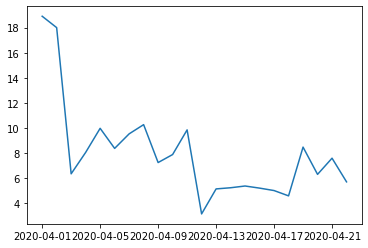

In [98]:
plt.plot(df['date'], df['R0_t'])